In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('customer_loan_data - customer_loan_data.csv')

In [4]:
df.head()

,customer,agreement_no,app_id,city,region,roi,dealer,tenure,disb_amount,scheme_code,remarks,loan_amt,disb_var,sales_rep,sales_manager,dt_loan
0,Chandranagraaj Vasamsetti,TL011,12198,Hyderabad,Telangana,11.99,Velocity Motors,30,74090,41,No Remark,75000,910,Aarav Malhotra,Aarav Sharma,2023-08-23
1,Swapnil Nana Lande,TL012,12204,Hyderabad,Telangana,11.99,Auto Avenue,30,61790,41,No Remark,62700,910,Aarav Malhotra,Aarav Sharma,2020-10-27
2,Syeda Meraj Unnisa,TL013,12356,Hyderabad,Telangana,11.99,Velocity Motors,18,73590,41,No Remark,74500,910,Advika Chatterjee,Aarav Sharma,2021-02-27
3,Kishor Gorakhnath Raibhan,TL014,12448,Hyderabad,Telangana,11.99,Prestige Auto Group,24,73090,41,No Remark,74000,910,Arjun Iyer,Aarav Sharma,2022-09-25
4,Balu Ramu Sawant,TL015,12449,Hyderabad,Telangana,11.99,Velocity Motors,12,84090,41,No Remark,85000,910,Advika Chatterjee,Aarav Sharma,2022-02-15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16998 entries, 0 to 16997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer       16998 non-null  object 
 1   agreement_no   16998 non-null  object 
 2   app_id         16998 non-null  int64  
 3   city           16998 non-null  object 
 4   region         16998 non-null  object 
 5   roi            16998 non-null  float64
 6   dealer         16998 non-null  object 
 7   tenure         16998 non-null  int64  
 8   disb_amount    16998 non-null  int64  
 9   scheme_code    15149 non-null  object 
 10  remarks        16998 non-null  object 
 11  loan_amt       16998 non-null  int64  
 12  disb_var       16998 non-null  int64  
 13  sales_rep      16998 non-null  object 
 14  sales_manager  16998 non-null  object 
 15  dt_loan        16998 non-null  object 
dtypes: float64(1), int64(5), object(10)
memory usage: 2.1+ MB


## Penjelasan Kolom
1. Customer: Name of the customer
2. Agreement No: Unique identifier for the loan agreement
3. App ID: Application identification number
4. City: City where the customer is located
5. Region: Region where the customer is locatd
6. ROI: Rate of interest for the loan
7. Dealer: The dealer or agency through which the loan was processed
8. Tenure: Duration of the loan in months
9. Disbursed Amount: The amount of loan disbursed
10. Scheme Code: A code representing the loan scheme
11. Remarks: Additional comments or remarks about the loan
12. Loan Amount: The total amount of loan approved.
13. Disbursed Variation: Variation in the disbursed amount from the approved loan amount.
14. Sales Rep: Name of the sales representative.
15. Sales Manager: Name of the sales manager overseeing the transaction.
16. Loan Date: Date when the loan was disbursed.

Data di atas dapat membantu Loan Manager untuk menemukan startegi peningkatan.

# Data Visualization

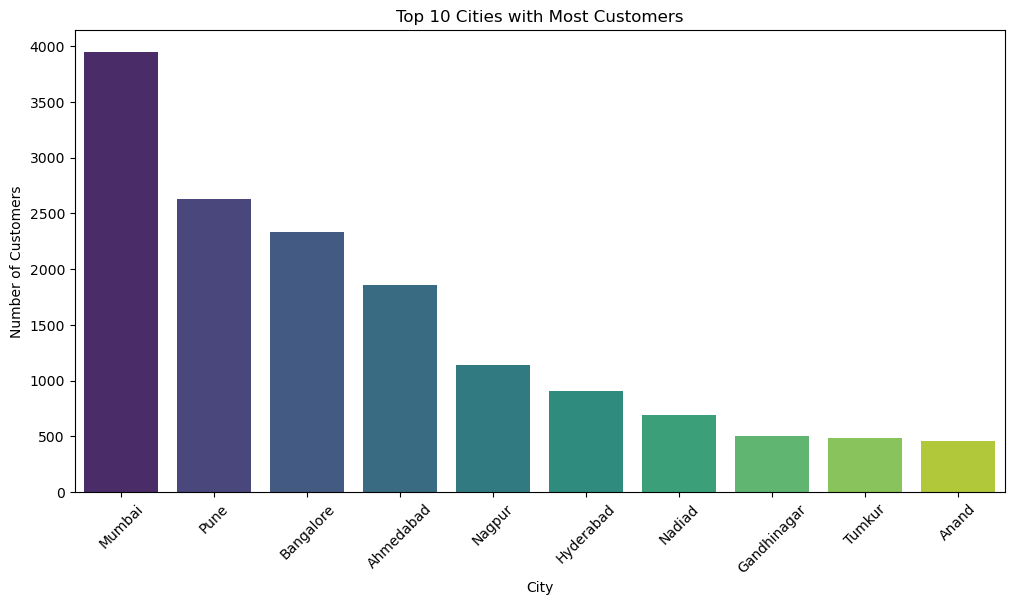

In [6]:
# Top 10 cities with the most customers
top_cities = df['city'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Top 10 Cities with Most Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

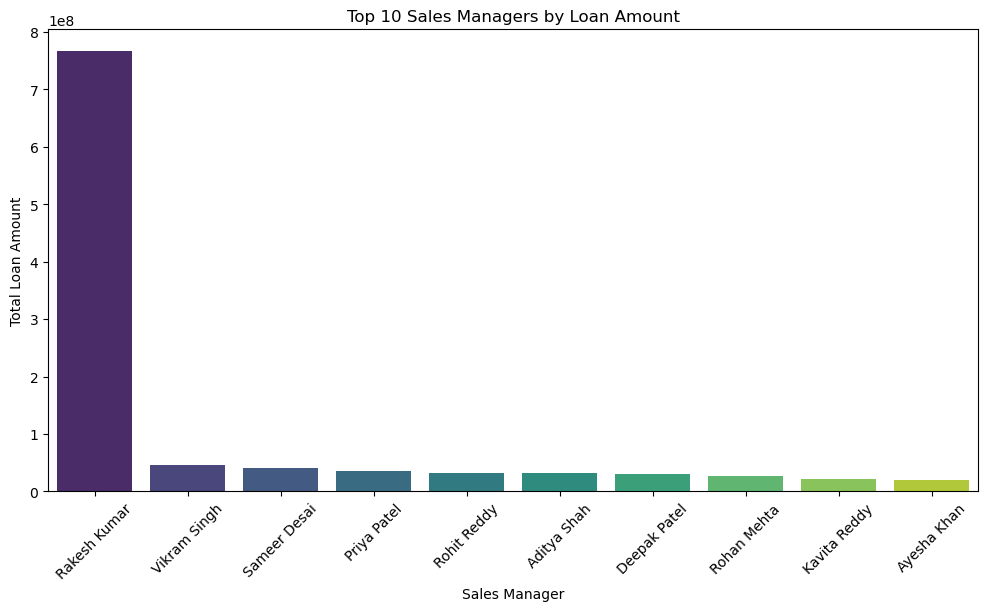

In [10]:
# Sum up loan amounts for each sales manager
sales_manager_loan_amount = df.groupby('sales_manager')['loan_amt'].sum().sort_values(ascending=False)

# Select the top 10 sales managers
top_sales_managers = sales_manager_loan_amount.head(10)

# Plot the top 10 sales managers by loan amount
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sales_managers.index, y=top_sales_managers.values, palette='viridis')
plt.title('Top 10 Sales Managers by Loan Amount')
plt.xlabel('Sales Manager')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=45)
plt.show()

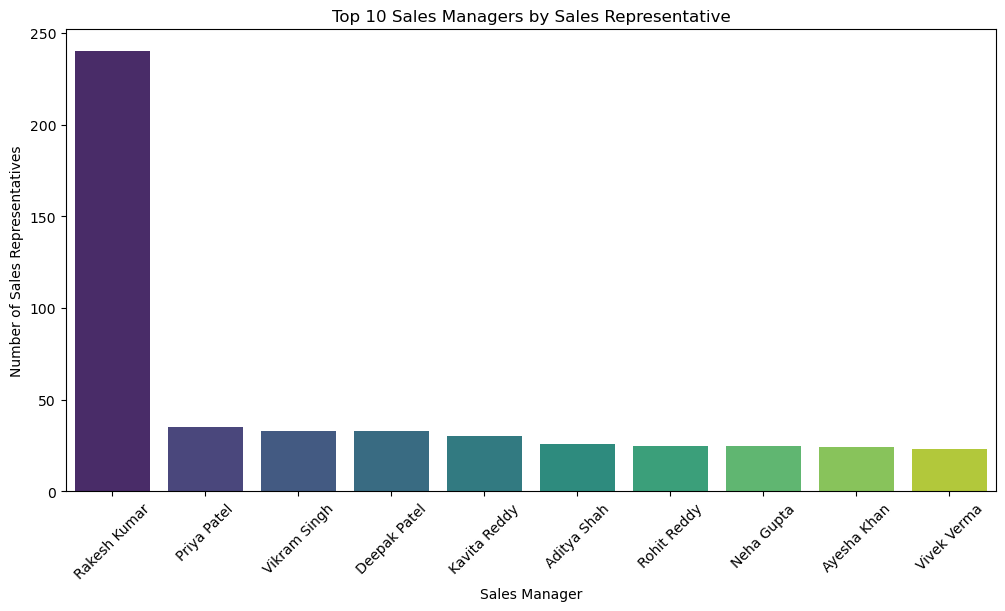

In [12]:
# Count the number of unique sales representatives for each sales manager
sales_manager_by_sales_rep = df.groupby('sales_manager')['sales_rep'].nunique().sort_values(ascending=False)

# Select the top 10 sales managers
top_sales_managers_by_sales_rep = sales_manager_by_sales_rep.head(10)

# Plot the top 10 sales managers by the count of sales representatives
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sales_managers_by_sales_rep.index, y=top_sales_managers_by_sales_rep.values, palette='viridis')
plt.title('Top 10 Sales Managers by Sales Representative')
plt.xlabel('Sales Manager')
plt.ylabel('Number of Sales Representatives')
plt.xticks(rotation=45)
plt.show()

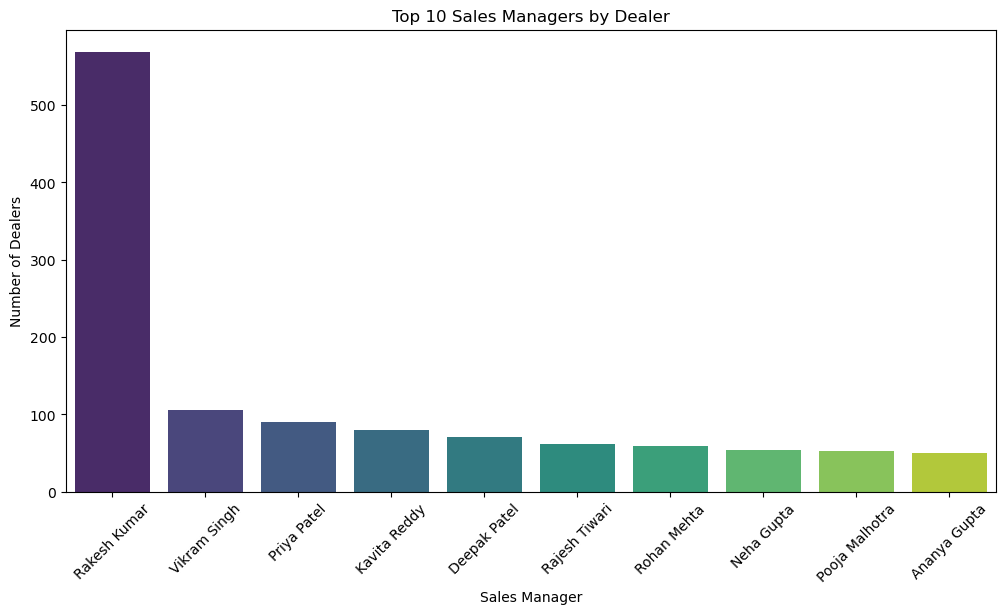

In [13]:
# Count the number of unique dealers for each sales manager
sales_manager_by_dealer = df.groupby('sales_manager')['dealer'].nunique().sort_values(ascending=False)

# Select the top 10 sales managers
top_sales_managers_by_dealer = sales_manager_by_dealer.head(10)

# Plot the top 10 sales managers by the count of dealers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sales_managers_by_dealer.index, y=top_sales_managers_by_dealer.values, palette='viridis')
plt.title('Top 10 Sales Managers by Dealer')
plt.xlabel('Sales Manager')
plt.ylabel('Number of Dealers')
plt.xticks(rotation=45)
plt.show()

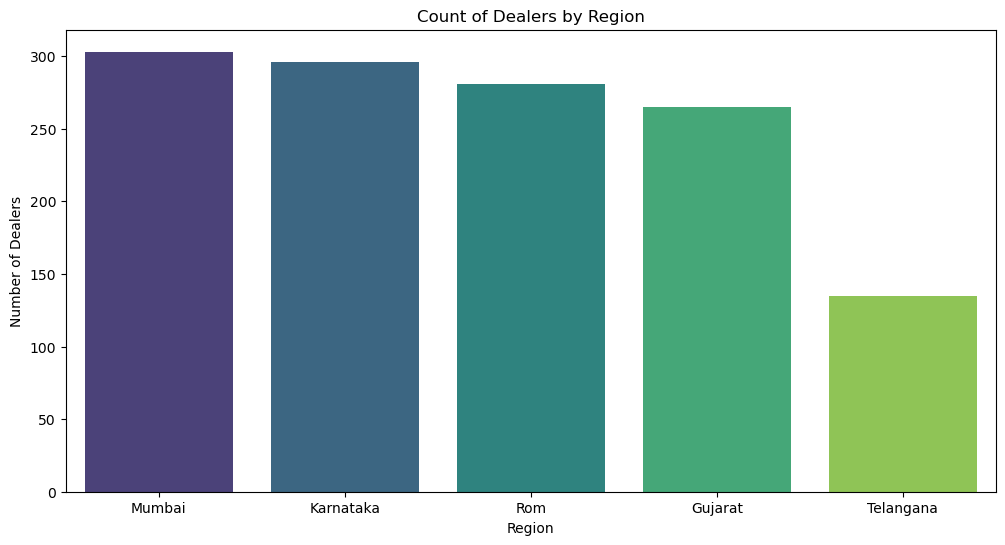

In [15]:
# Count the number of unique dealers in each region
dealers_by_region = df.groupby('region')['dealer'].nunique().sort_values(ascending=False)

# Plot the count of dealers by region
plt.figure(figsize=(12, 6))
sns.barplot(x=dealers_by_region.index, y=dealers_by_region.values, palette='viridis')
plt.title('Count of Dealers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Dealers')
plt.xticks()
plt.show()

Understanding what makes Rakesh Kumar excel, as well as how the sales team is strategically placed and effective in getting loans approved, can be a guide for the company's success. By aligning the distribution of the team with successful models, the company can improve its sales process, increase productivity, and approve more loans.